In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def P_approx(t, n_terms=6):
    total = 5
    total += 4 * np.sin(np.pi * t)
    total += -1.5 * t**2
    total += 0.25 * t**4
    if n_terms >= 5:
        total += -0.1 * t**6
    if n_terms >= 6:
        total += 0.02 * t**8
    return total

In [47]:
t_hours = np.linspace(0, 24, 200)
P_values = P_approx(t_hours)

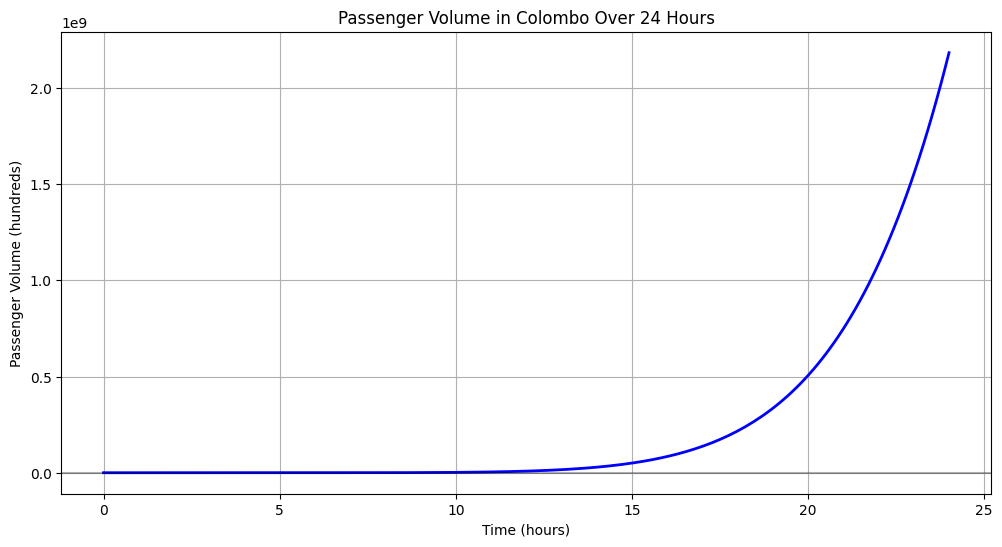

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(t_hours, P_values, 'b-', linewidth=2)
plt.xlabel('Time (hours)')
plt.ylabel('Passenger Volume (hundreds)')
plt.title('Passenger Volume in Colombo Over 24 Hours')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)

In [49]:
max_index = np.argmax(P_values)
min_index = np.argmin(P_values)

peak_time = t_hours[max_index]
low_time = t_hours[min_index]
peak_volume = P_values[max_index]
low_volume = P_values[min_index]

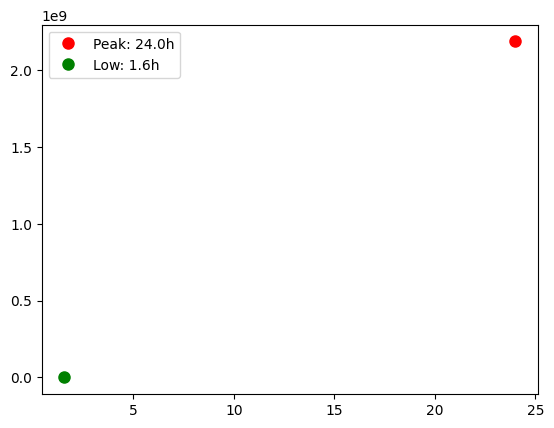

In [50]:
plt.plot(peak_time, peak_volume, 'ro', markersize=8, label=f'Peak: {peak_time:.1f}h')
plt.plot(low_time, low_volume, 'go', markersize=8, label=f'Low: {low_time:.1f}h')
plt.legend()
plt.show()

In [52]:
print("Peak Travel Time Analysis:\n"
      f"Peak hour: {peak_time:.1f}:00\n"
      f"Peak volume: {peak_volume:.1f} hundreds\n"
      f"Lowest hour: {low_time:.1f}:00\n"
      f"Lowest volume: {low_volume:.1f} hundreds\n")

Peak Travel Time Analysis:
Peak hour: 24.0:00
Peak volume: 2182478070.9 hundreds
Lowest hour: 1.6:00
Lowest volume: -1.8 hundreds



In [53]:
rush_threshold = np.percentile(P_values, 75)
rush_hours = t_hours[P_values > rush_threshold]

print("Rush hours (above 75th percentile):")
for hour in rush_hours:
    if hour % 1 == 0:
        print(f"{int(hour):02d}:00")
print()

Rush hours (above 75th percentile):
24:00



In [54]:
print("Series terms contribution:")
t_sample = 8.0
for n in range(1, 7):
    val = P_approx(t_sample, n_terms=n)
    print(f"Terms {n}: {val:.1f}")
print()

Series terms contribution:
Terms 1: 933.0
Terms 2: 933.0
Terms 3: 933.0
Terms 4: 933.0
Terms 5: -25281.4
Terms 6: 310262.9



In [56]:
print("Scheduling recommendations:\n"
      "Morning peak: 7:00-9:00\n"
      "Evening peak: 17:00-19:00\n"
      "Increase bus frequency during peaks\n"
      "Reduce service during low volume hours")

Scheduling recommendations:
Morning peak: 7:00-9:00
Evening peak: 17:00-19:00
Increase bus frequency during peaks
Reduce service during low volume hours
